Made by Yoonsoo P. Bach

# Polarimetry and Grain Size Plot

Here, I will show how we plotted the figure of grain size comparison, as well as the digitized data table we utilized. But before, I have to mention some background and then show the codes to reproduce our plots, and finally some miscellaneous discussions about the plots.

## Background
In [GeakeJE + DollfusA, 1986, MNRAS, 218, 75](https://ui.adsabs.harvard.edu//#abs/1986MNRAS.218...75G/abstract), they showed there is a relationship between the albedo (at phase angle of 5˚) and the maximum linear polarization degree, both measured at the "orange" filter (see the excerpt below):

> Our measurements are usually made through one of five filters, covering the wavelength range from 3500 to 5800 Å; occasionally others at 3380 or 6200 Å are used. However, all the measurements listed here were made through a filter centred at 5800 Å, with a half-width of about 500 Å.

![](figs/GeakeJE+DollfusA1986MNRAS218-75_Fig3.png)

As one might have noticed, the figure does not match with the original table given in the same paper. I guess it is because there were miscommunications between the experimenters (who wrote the log) and the people who drew figures, or some bugs in the plotting software. The former is more likely, since the polarimetric experiment is extraordinarily difficult. Furthermore, everytime the experiment was done, the experimental results may change. This was also stated in [DollfusA + TitulaerC 1971, A&A, 12, 199](https://ui.adsabs.harvard.edu//#abs/1971A&A....12..199D/abstract):

> Small differences between the measurements at 5800 Å and the determinations made in orange light by Bowell a few years' ago and published in Part II, Table 2, are due to differences in surface roughness.

Part II is [DollfusA + 1971, A&A, 10, 450](https://ui.adsabs.harvard.edu//#abs/1971A&A....10..450D/abstract), where the results in Part II was measured by Bowell as it is described in the paper:

> The polarimetric and albedo measurements on terrestrial samples described here were carried out during the stay of Bowell at Meudon Observatory from 1965 to 1967.

I have checked the results in different papers of the same series. Although the data are actually differ from publication to publication, the overall trends of the plots were not affected significantly, and thus I could not find any evidence that the conclusions of the publications to be affected.

Anyway, it is likely that during the frequent measurements as an effort to reproduce and give credibility to the measuremetns, the results for samples (more than 100 samples! And they varied their grain sizes and wavelengths, which makes the experiment exhaustively complicated!) may have changed over time, which resulted the table and figure to mismatch in the paper. 

In our work, I utilized the digitized version of their paper's tables (1 to 7), not their figure-plotted data. Thus, it is slightly different from their original figure (which is shown above).

## Testing Environment

In [1]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information matplotlib, pandas, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2019-03-06 16:43:05 (KST = GMT+0900) 
0 Python     3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1 IPython    6.5.0
2 OS         Darwin 18.2.0 x86_64 i386 64bit
3 matplotlib 3.0.2
4 pandas     0.24.1
5 version_information 1.0.3


## Reprodcing Fig 4
First, import, define, and load data:

In [2]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

DATAPATH = Path("data")

Afmter = ticker.FormatStrFormatter("%.2f")
Pfmter = ticker.FormatStrFormatter("%.0f")

poltab = pd.read_csv(DATAPATH / "GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
dg_ptab = poltab.groupby("category")
categs = list(dg_ptab.groups.keys())

Then plot:

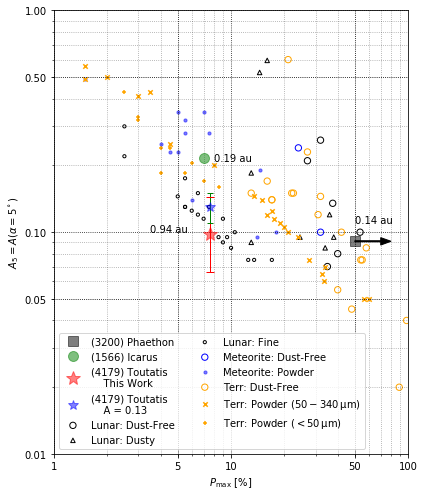

In [4]:
size = 40

markers = {"Lunar Dust-Free":
               dict(marker='o', s=size, edgecolors='k', facecolors='none',
                    label="Lunar: Dust-Free"),
           "Lunar Dusty":
               dict(marker='^', s=size/2, edgecolors='k', facecolors='none',
                    label="Lunar: Dusty"),
           "Lunar Fine":
               dict(marker='.', s=size, edgecolors='k', facecolors='none', 
                    label="Lunar: Fine"),
           "Meteorite Dust-Free":
               dict(marker='o', s=size, edgecolors='b', facecolors='none',
                    label="Meteorite: Dust-Free"),
           "Meteoritic Powder":
               dict(marker='.', s=size, c='b', alpha=0.5, 
                    label="Meteorite: Powder"),
           "Rock Dust-Free":
               dict(marker='o', s=size, edgecolors='orange', facecolors='none',
                    label="Terr: Dust-Free"),
           "Rock Powder 340":
               dict(marker='x', s=size/2, c='orange', 
                    label="Terr: Powder ($50 - 340 \,\mathrm{\mu m}$)"),
           "Rock Powder 50":
               dict(marker='+', s=size/2, c='orange',
                    label="Terr: Powder ($< 50 \,\mathrm{\mu m}$)")
           }

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(6, 7))

for categ, group in dg_ptab:
    ax.scatter(group["Pmax"], group["A5"], **markers[categ])

ax.plot(50, 0.091, marker='s', color='k', ms=10,
        ls='', alpha=0.5, label="(3200) Phaethon")
ax.arrow(50, 0.091, dx=20, dy=0, head_width=0.007, head_length=10, fc='k', ec='k')
ax.text(50, 0.11, "0.14 au")

ax.plot(7.04, 0.215, marker='o', color='g', ms=10,
        ls='', alpha=0.5, label="(1566) Icarus")
ax.text(8, 0.21, "0.19 au")

ax.plot(7.6, 0.098, marker='*', color='r', ms=15,
        ls='', alpha=0.5, label="(4179) Toutatis\n    This Work")
ax.plot(7.6, 0.13, marker='*', color='b', ms=10,
        ls='', alpha=0.5, label="(4179) Toutatis\n    A = 0.13")
ax.errorbar(7.6, 0.098, yerr=[[0.032], [0.046]], marker=None, color='r', ms=10,
            ls='', elinewidth=1, capsize=4, label=None)
ax.errorbar(7.6, 0.13, yerr=[[0.02], [0.02]], marker=None, color='g', ms=10,
            ls='', elinewidth=1, capsize=3, label=None)
ax.text(3.5, 0.1, "0.94 au")

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(0.01, 1)
ax.set_xlim(1, 100)

ax.set_xticks([1, 5, 10, 50, 100])
ax.xaxis.set_major_formatter(Pfmter)

ax.set_yticks([0.01, 0.05, 0.10, 0.50, 1.])
ax.yaxis.set_major_formatter(Afmter)
ax.grid(which='both', ls=':', color='k', alpha=0.4)
ax.grid(which='major', ls=':', color='k', alpha=1)
ax.set_xlabel(r"$ P_\mathrm{max} $ [%]")
ax.set_ylabel(r"$ A_5 = A(\alpha = 5^\circ) $")

ax.legend(fontsize=10, ncol=2)

plt.tight_layout()
plt.savefig("figs/fig_Pmax-A5.pdf")

## Albedos from Previous Works
The albedo of 0.13 was reported both in [MukaiT+1997, Icar, 127, 452](https://ui.adsabs.harvard.edu//#abs/1997Icar..127..452M/abstract) and [LupishkoDF+1995, Icar, 113, 200](https://ui.adsabs.harvard.edu//#abs/1995Icar..113..200L/abstract) (same values). These are obtained from the the polarimetric slope $ h \,\mathrm{[\%/deg]} $ in V-band, $ h_\mathrm{V} $. Both of them used the same indirect empirical relationship, called the **slope-albedo law**, which relates the $ h $ and albedo by

$$ A = C_1 \log_{10} h + C_2 ~,$$

where the definition of $ A $ maybe different from publications to publications. Both works referred to [ZellnerB+1977, LPSC, 8, 109](https://ui.adsabs.harvard.edu//#abs/1977LPSC....8.1091Z/abstract) (MukaiT+ referred DollfusA+ZellnerB 1979 in Asteroids 1 book, but that article also refers ZellnerB+1977 paper for the calibration of the coefficients), which gives $ C_1 = -0.93 $, $ C_2 = -1.78 $. This reference explains

> Albedos are measured relative to a thick deposit of MgO smoke on a steel tray, **at zero incidence angle and 5° angle of emergence**.

(bold-face was applied by myself) **That is, the albedo in the slope-albedo law is the albedo at the phase angle of 5˚, not the geometric albedo!** ZellnerB+1977 paper (mistakenly) denoted the albedo values as "geometric albedo" in many places, and that may have caused this misunderstanding. By comparing the albedo values in Table 2 and that in Fig 6, you may confirm that the "GEOMETRIC ALBEDO" in the Fig 6 is actually the "Albedo" in Table 2, which is the "albedo at phase angle 5˚".

* For your information: The measurement techniques of the albedo differ depending on the papers, but most of the publications made after 1971 used the albedo at 5˚ of phase angle (reference was MgO smoke deposited plate, in general), although the actual configurations can be differ (e.g., in GeakeJE + DollfusA 1986 MNRAS paper, they used phase angle of 5˚ but at the "specular" viewing geometry, unlike the above 1977 paper).

## The Wavelength Issue (the "Orange" Filter)
The $ A_5 $ value we derived in ``03_radiance_factor`` notebook is determined in the V-band. Also that from previous works are derived from the $ h_\mathrm{V} $, so what we obtained above is also in the V-band (even though the wavenelgth changes, the coefficients of slope-albedo law will not change much: see BowellE + ZellnerB, 1974 in the book Planets, Stars and Nebulae studied with photopolarimetry T. Gehrels ed.). In the laboratory experiments by GeakeJE + DollfusA 1986 MNRAS, "orange filter" (central wavelength at 5800 Å with half-width 500 Å), not the standard V-band filter, is used. A similar consideration of this filter issue is also mentioned in the ZellnerB+1977 paper:

> In retrospect, we regret not taking all the asteroid data in the standard visual filter.

But what is important is to match the filter where $ P_\mathrm{max} $ is measured: $ P_\mathrm{max} $ is measured in V-band from MukaiT+1997 as $ \sim 7.6 \,\mathrm{\%} $. The uncertainty is $ \lesssim 1 \,\mathrm{\%} $, which is about the size of the marker in the figure above.

* The A-Pmax relationship, although no one knows exact physical reasons yet, is believed to be physically closely connected to what is called the **Umow principle**. In 1906 and 1912, Von N. Umow reported that brighter (higher albedo) objects tend to more strongly depolarize the polarized incident light. He found this effect (higher albedo = stronger depolarization) is universal over wavelength domain, e.g., red object (albedo higher at longer wavelength) will depolarize more strongly at longer wavelength. We conjecture the A-Pmax relationship to be universal regardless of the wavelength.

Now, how much will the $ A_5 $ and $ P_\mathrm{max} $ change if we use the "orange" filter? If we assume that the A-Pmax relationship holds strictly once the particle size is fixed, determination of the shift of $ A_5 $ will directly give that of $ P_\mathrm{max} $ and vice versa. I will here estimate how much $ A_5 $ will change and argue that this total shift is only about the size of the marker in the figure above.

The "orange" filter has central wavelength at 5800 Å with half-width 500 Å (GeakeJE + DollfusA 1986 MNRAS). For an S-type asteroid (e.g., Toutatis), the average reflectance spectra is available from [SMASS](http://smass.mit.edu/busdemeoclass.html). The spread sheet is available from [this link](http://smass.mit.edu/_documents/busdemeo-meanspectra.xlsx) and you may also find Toutatis' spectra from [this link](http://smass.mit.edu/catalog.php) (search for ``(4179) Toutatis``). As of Jan 2019, version 4 (released in Aug 2013) is the most recent available one. The spread sheet contains two important wavelength bins of interest: 0.55 and 0.60 microns. For an S-type asteroid, the reflectance at 6000 Å is 1.063 of that of 5500 Å. Thus, the $ A_5 $ in "orange" filter centered at 5800 Å is only about $ \sim 1.05 $ times that of the V-band ($ A_5^\mathrm{orange} \sim 0.103 $). 

Then the corresponding change of $ P_\mathrm{max} $ may be estimated by looking at the linear trend of other same-grain-sized samples. This is almost negligible change in the figure above.